In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:\Users\shrey\Desktop\MLPP_iHUB_IITR_Sept_2023\DATA\mouse_viral_study.csv")
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


In [4]:
df.shape

(400, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Med_1_mL       400 non-null    float64
 1   Med_2_mL       400 non-null    float64
 2   Virus Present  400 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


In [6]:
df.describe()

,Med_1_mL,Med_2_mL,Virus Present
count,400.000000,400.000000,400.000000
mean,5.447984,5.616750,0.500000
std,2.319059,2.336637,0.500626
min,1.000000,1.000000,0.000000
25%,3.249062,3.431311,0.000000
50%,5.393776,5.638471,0.500000
75%,7.630389,7.782614,1.000000
max,10.000000,10.000000,1.000000


# EDA

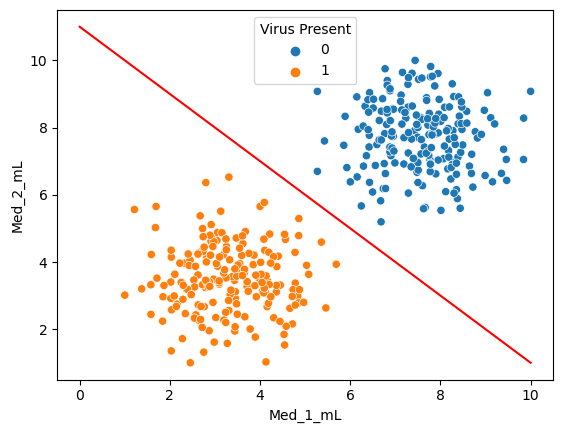

In [15]:
sns.scatterplot(x='Med_1_mL',y='Med_2_mL',data = df, hue = 'Virus Present')

#Create Separating Hyperplane

x = np.linspace(0,10,100)
m = -1
b = 11
y = m*x + b
plt.plot(x,y,'red')

# SVM 

In [16]:
from sklearn.svm import SVC

In [33]:
#help(SVC)

In [20]:
X = df.drop('Virus Present',axis = 1)
y = df['Virus Present']

In [65]:
svm_lin = SVC(kernel='linear', C = 1)
svm_lin.fit(X,y)

SVC(C=1, kernel='linear')

In [66]:
from svm_margin_plot import plot_svm_boundary

C:\Users\shrey\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


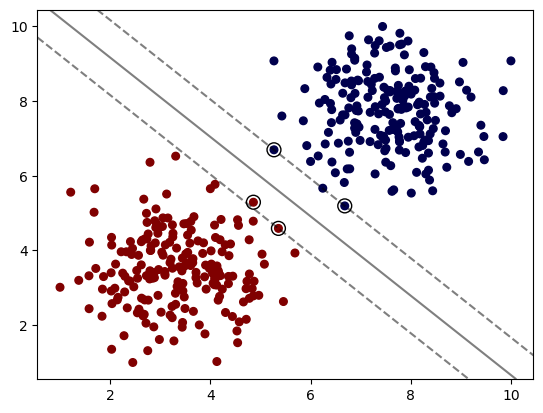

In [67]:
plot_svm_boundary(svm_lin,X,y)

# Hyper Parameter C

In [30]:
svm_lin1 = SVC(kernel = 'linear',C= 0.1)
svm_lin1.fit(X,y)

SVC(C=0.1, kernel='linear')

C:\Users\shrey\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


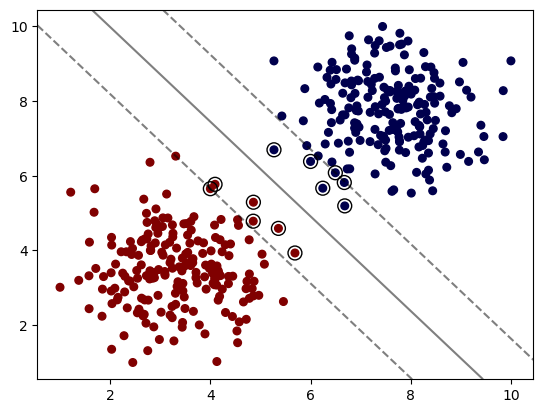

In [31]:
plot_svm_boundary(svm_lin1,X,y)

# Radial Basis Function

C:\Users\shrey\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


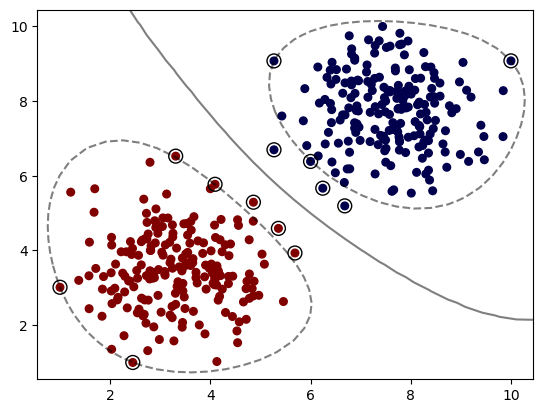

In [42]:
svm_rbf = SVC(kernel='rbf', C = 1, gamma= 'scale')
svm_rbf.fit(X,y)
plot_svm_boundary(svm_rbf,X,y)

# Polynomial Kernel

C:\Users\shrey\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


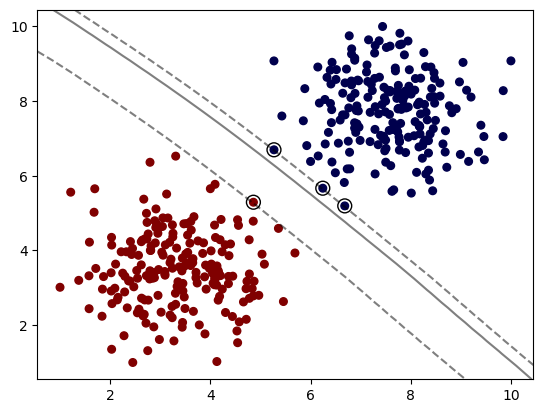

In [51]:
svm_poly = SVC(kernel='poly',C=.02,degree=20)
svm_poly.fit(X,y)
plot_svm_boundary(svm_poly,X,y)

# Grid Search

In [52]:
from sklearn.model_selection import GridSearchCV

In [68]:
svm_gs = SVC()
param_grid = {'C':[0.01,.1,1,10],'kernel':['linear','rbf','poly','sigmoid']}
grid = GridSearchCV(svm_gs,param_grid)

In [69]:
grid.fit(X,y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']})

In [70]:
grid.best_params_

{'C': 0.01, 'kernel': 'linear'}